## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

#### Read RegData csv file into numpy array 

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

#### Use R2 score to evaluate LR equation output
https://en.wikipedia.org/wiki/Coefficient_of_determination

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [2]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [3]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [4]:
X=data[:,:3]
X=np.concatenate((np.ones(data.shape[0])[:, np.newaxis], X), axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [5]:
y=data[:,-1]
y=y.reshape(X.shape[0],1)
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [9]:
def Gradient_descent(X,y,alpha=0.0001,itrations=1000):
    theta=np.zeros(X.shape[1]).reshape(X.shape[1],1)
    #y_pridcted=np.zeros(y.shape)
    error_vic=[]
    for itrate in range(itrations):
        y_pred=X@theta
        erorr=y_pred-y
        cost=(np.linalg.norm(erorr)**2)/(erorr.size*2)
        d_theta=(X.T@erorr)/erorr.size


        if itrate>=1 :
            if np.linalg.norm(d_theta)<0.0001 or abs(cost-error_vic[-1])<.0001:
                break
        theta=theta-(alpha*d_theta)
        error_vic.append(cost)
    return theta,cost,error_vic,itrate


In [10]:

theta,cost,error_vic,itrate = Gradient_descent(X,y,alpha=0.0001,itrations=10000)
y_pred = np.dot(X,theta)
print("**************Report**************\n")
print("iterations: ",itrate)
print("Cost:",cost,"\n")
print("theta opt:",theta,"\n")
print("y_pred:",y_pred,"\n")
print("y_true:",y,"\n")

**************Report**************

iterations:  1321
Cost: 3.085393011977162 

theta opt: [[4.85235445e-04]
 [4.13248847e-01]
 [5.16173838e-01]
 [1.08527300e+00]] 

y_pred: [[152.857033  ]
 [184.78631462]
 [181.42602175]
 [198.78471053]
 [140.20423427]
 [105.33668559]
 [150.27754058]
 [113.44529589]
 [174.405438  ]
 [164.28333668]
 [143.87175323]
 [142.78940589]
 [186.22898549]
 [153.16598008]
 [151.25988859]
 [188.55830745]
 [144.74549705]
 [180.85967613]
 [177.18785475]
 [158.64234475]
 [175.95241063]
 [174.45543767]
 [167.32452873]
 [151.30420906]
 [190.77747634]] 

y_true: [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 



#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

### Plot loss vs. iterations

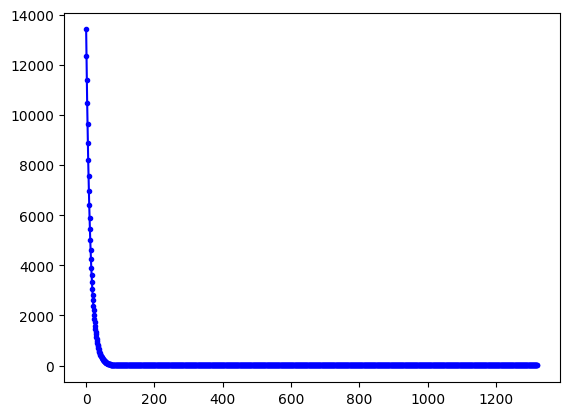

In [16]:
plt.plot(error_vic,".-b")

#### Use R2 score to evaluate LR equation output

In [17]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9888814345699838